In [48]:
!pip install quantecon_book_networks

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.8/364.8 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.4/215.4 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.0/823.0 kB 10.3 MB/s eta 0:00:00


In [2]:
import pandas as pd

In [49]:
import networkx as nx
import matplotlib.pyplot as plt
import quantecon_book_networks
import quantecon_book_networks.input_output as qbn_io
import quantecon_book_networks.plotting as qbn_plt
import quantecon_book_networks.data as qbn_data
import matplotlib as mpl
from matplotlib.patches import Polygon

In [232]:
import numpy as np

In [203]:
mip = pd.read_csv('/content/MIP  - Hoja 1 (2).csv', index_col=0)

In [204]:
columnas = mip.columns

In [205]:
for col in columnas:
  mip[col] = mip[col].astype(float)

In [206]:
mip.shape

(123, 123)

In [207]:
valores_intermedios = pd.read_csv('/content/Valores intermedios.csv')

In [208]:
valores_intermedios.iloc[1,0]

557481.67

In [209]:
# Armo la matriz de coeficientes técnicos.
for i in range(mip.shape[0]):
  for j in range(mip.shape[0]):
    if valores_intermedios.iloc[j,0] != 0:
      mip.iloc[i, j] = mip.iloc[i, j] / valores_intermedios.iloc[j,0]
    else:
      mip.iloc[i,j] = 0

In [210]:
mip

,"Cultivo de cereales, oleaginosas y forrajeras","Cultivo de hortalizas, legumbres, flores y plantas ornamentales",Cultivo de frutas y nueces,Cultivos industriales,Producción de semillas,"Cría de ganado y producción de leche, lana y pelos",Producción de granja,Servicios agropecuarios,Caza,Silvicultura y extracción de madera,...,Enseñanza pública,Enseñanza privada,Salud humana pública,Salud humana privada,Servicios veterinarios,Servicios sociales,Servicios de saneamiento,Actividad de asociaciones,"Servicios de cine, radio y televisión","Servicios personales, de reparación, actividades deportivas y de esparcimiento"
"Cultivo de cereales, oleaginosas y forrajeras",0.010319,0.000000,0.021804,0.005831,0.000000,0.152144,0.058182,0.000000,0.000000,0.000000,...,0.0,0.000699,0.0,0.000123,0.002589,0.0,0.000000,0.000000,7.665287e-09,3.667518e-03
"Cultivo de hortalizas, legumbres, flores y plantas ornamentales",0.000000,0.167226,0.013082,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.010121,0.0,0.002514,0.000000,0.0,0.000000,0.008649,5.289048e-07,8.638087e-03
Cultivo de frutas y nueces,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.004982,0.0,0.001217,0.000000,0.0,0.000000,0.000000,4.599172e-08,4.729049e-07
Cultivos industriales,0.000000,0.000000,0.000000,0.020212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00
Producción de semillas,0.097189,0.021008,0.052329,0.007799,0.021740,0.013291,0.001349,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Servicios sociales,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00
Servicios de saneamiento,0.000004,0.000009,0.000009,0.000004,0.000004,0.000004,0.000005,0.000004,0.000001,0.000006,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00
Actividad de asociaciones,0.000277,0.000634,0.000573,0.000253,0.000273,0.000254,0.000418,0.000248,0.000073,0.000404,...,0.0,0.000000,0.0,0.125844,0.103975,0.0,0.000000,0.000000,1.514040e-03,0.000000e+00
"Servicios de cine, radio y televisión",0.000121,0.000248,0.000220,0.000100,0.000100,0.000108,0.000606,0.000090,0.000030,0.001565,...,0.0,0.009468,0.0,0.005010,0.008487,0.0,0.060125,0.048985,8.850829e-02,4.419621e-03


In [211]:
mip.index

Index(['Cultivo de cereales, oleaginosas y forrajeras',
       'Cultivo de hortalizas, legumbres, flores y plantas ornamentales',
       'Cultivo de frutas y nueces', 'Cultivos industriales',
       'Producción de semillas',
       'Cría de ganado y producción de leche, lana y pelos',
       'Producción de granja', 'Servicios agropecuarios', 'Caza',
       'Silvicultura y extracción de madera',
       ...
       'Enseñanza pública', 'Enseñanza privada', 'Salud humana pública',
       'Salud humana privada', 'Servicios veterinarios', 'Servicios sociales',
       'Servicios de saneamiento', 'Actividad de asociaciones',
       'Servicios de cine, radio y televisión',
       'Servicios personales, de reparación, actividades deportivas y de esparcimiento'],
      dtype='object', length=123)

In [214]:
# Drop de sectores que no tienen relación con otros sectores (Hay 3)
for i, col in enumerate(columnas):
   if (mip[col] == 0).all():
    mip = mip.drop(labels = col, axis = 0)
    mip = mip.drop(labels = col, axis = 1)
    valores_intermedios.drop(i,inplace=True)

In [217]:
graph = mip.copy()
graph = graph.values

In [218]:
# Removemos aristas a si mismas.
for i in range(mip.shape[0]):
    graph[i,i] = 0

In [220]:
graph.shape

(120, 120)

In [176]:
g = nx.Graph(graph)

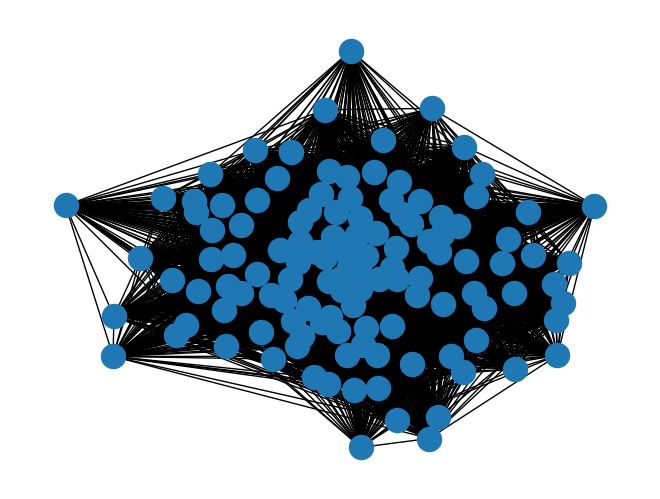

In [177]:
#Primer test
nx.draw(g, pos=nx.spring_layout(g))

In [183]:
?? qbn_plt.plot_graph # Uso esta implementación.

In [240]:
grado_nodo = np.zeros(len(graph)) # Me fijo el grado de cada nodo segun un umbral. (No cuento aristas con poco peso)
for i in range(len(graph)):
  aristas = 0;
  for j in range(len(graph)):
    if graph[i][j] > 0.2:
      aristas = aristas + 1
  grado_nodo[i] = aristas


In [249]:
fig, ax = plt.subplots(figsize=(25, 25))
plt.axis("off")

G = nx.DiGraph()
N = len(graph)
centrality = qbn_io.eigenvector_centrality(mip) #Funcion para sacar colores lindos para el grafo.
colores_nodo = qbn_io.colorise_weights(centrality,beta=False)

#Agrego nodos.
for i, w in enumerate(valores_intermedios.iloc[:,0]):
  G.add_node(mip.columns[i], weight = w, name=mip.columns[i])



tamaños_nodo = 400 + (grado_nodo * 200)
edge_colors = []
edge_widths = []
for i in range(N):
  for j in range(N):
    a = graph[i,j]
    G.add_edge(mip.columns[i], mip.columns[j])
    edge_colors.append(colores_nodo[i])
    width = a
    edge_widths.append(width)

pos_nodos = nx.spring_layout(G)

nx.draw_networkx_nodes(G,
                       pos_nodos,
                       node_color=colores_nodo,
                       node_size=tamaños_nodo,
                       edgecolors='grey',
                       linewidths=10,
                       alpha=0.6,
                       ax=ax
                       )

nx.draw_networkx_edges(G,
                      pos_nodos,
                      edge_color=edge_colors,
                      width=edge_widths,
                      arrows=True,
                      arrowsize=5,
                      alpha=0.6,
                      ax=ax,
                      arrowstyle='->',
                      node_size= 10,
                      connectionstyle='arc3,rad=0.15')

nx.draw_networkx_labels(G,
                       pos_nodos,
                       font_size=7,
                       ax=ax
)


plt.show()

Output hidden; open in https://colab.research.google.com to view.